# summary-generator-wp-sites

Use the "Run" button to execute the code.

In [1]:
# !pip install numpy


In [2]:
import numpy as np
import json

# Summary Generator

In [3]:
CONTENT_OBJ = None #function parameter
SCHEMA_PATH = "../schema.json"
CONTENT_FILE = "../certifiedcomic.json"
# CONTENT_FILE="porterandyork.json"


In [4]:
#reading content
with open(CONTENT_FILE) as f:
    CONTENT_OBJ = json.load(f)

In [5]:
len(CONTENT_OBJ)

3

In [11]:
CONTENT_OBJ.keys()

dict_keys(['wordpress', 'woocommerce', 'shopify'])

# summarizing woocommerce
Tasks:
* list all the tags, categories
* list all the price, regular price, sales price
* list all the dates
* count on_sale items
* list all the ratings
* list all the reviews counts


# tags analysis

In [12]:
# ['woocommerce']['edges']['wc/store/products'][index]['tags'][index2]['name']
# ['woocommerce']['edges]['wc/store/products/tags'][index]['name']

tag_set_1 = set([ (tag['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
              for tag in product['tags']])  #captured from products 
              
#captured from products/tags               
tag_set_2 = set([(tag['name']).lower() for tag in CONTENT_OBJ['woocommerce']['edges']['wc/store/products/tags']])

In [13]:
tag_set_1 == tag_set_2

False

In [14]:
len(tag_set_1), len(tag_set_2)

(153, 100)

In [15]:
tag_set_1 - tag_set_2

{'0.5',
 'adam warlock',
 'aquaman',
 'baron zemo',
 'beast',
 'bishop',
 'blade',
 'cad bane',
 'champions',
 'chaos',
 'coffin comics',
 'cyberforce',
 'cyclops',
 'dark empire',
 'darth maul',
 'dazzler',
 'demon days',
 'despero',
 'doctor a',
 'doctor doom',
 'dr. doom',
 'emma frost',
 'final night',
 'future state',
 'gambit',
 'green goblin',
 'guardian',
 'hero comics',
 'him',
 'hydro-man',
 'illuminati',
 'iron fist',
 'juggernaut',
 'kang',
 'key issues',
 'lady death',
 'lizard',
 "logan's run",
 'love is love',
 'luke skywalker',
 'magneto',
 'masters of evil',
 'maverick',
 'milestone',
 'mole man',
 'monica rambeau',
 'morbius',
 'mutant x',
 'mysterio',
 'new avengers',
 'non-stop spider-man',
 'nova',
 'old man logan',
 'omega red',
 'pedigree',
 'photon',
 'proteus',
 'quicksilver',
 'red ghost',
 'red hulk',
 'red x',
 'rogue',
 'rogue squadron',
 'sabretooth',
 'she hulk',
 'she-hulk',
 'shriek',
 'silk',
 'silver dagger',
 'spider-verse',
 'static',
 'sub-mariner'

In [16]:
tag_set_1.intersection(tag_set_2)

{'1st appearance',
 '4.0',
 '4.5',
 '5.0',
 '5.5',
 '6.0',
 '6.5',
 '7.0',
 '7.5',
 '8.0',
 '8.5',
 '9.0',
 '9.2',
 '9.4',
 '9.6',
 '9.8',
 'amazing spider-man',
 'avengers',
 'batman',
 'black cat',
 'black label',
 'black panther',
 'captain america',
 'captain marvel',
 'carnage',
 'cgc',
 'darth vader',
 'dc',
 'detective comics',
 'doctor strange',
 'fantastic four',
 'first appearance',
 'flash',
 'ghost rider',
 'ghost spider',
 'green lantern',
 'hulk',
 'idw',
 'image',
 'iron man',
 'jane foster',
 'joker',
 'justice league',
 'key issue',
 'marvel',
 'marvel spotlight',
 'moon knight',
 'ms. marvel',
 'scarlet witch',
 'secret wars',
 'signature series',
 'spawn',
 'spider-gwen',
 'spider-man',
 'spider-woman',
 'star wars',
 'superman',
 'teen titans',
 'teenage mutant ninja turtles',
 'thanos',
 'thor',
 'top cow',
 'ultimate spider-man',
 'variant',
 'venom',
 'vision',
 'witchblade',
 'wolverine',
 'x-men'}

In [17]:
len(tag_set_1.union(tag_set_2))

184

It looks like tag provided inside the product description are not completely provided in product/tags 

# Category Analysis

In [18]:
# ['woocommerce']['edges']['wc/store/products'][index]['categories'][index2]['name']
# ['woocommerce']['edges]['wc/store/products/categories'][index]['name']

category_set_1 = set([ (category['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
              for category in product['categories']])  #captured from products 

#captured from product tags               
category_set_2 = set([(category['name']).lower() for category in CONTENT_OBJ['woocommerce']['edges']['wc/store/products/categories']])

In [19]:
category_set_1 == category_set_2

False

In [20]:
len(category_set_1), len(category_set_2) 

(3, 10)

In [21]:
category_set_2.intersection(category_set_1)

{'cbcs', 'cgc', 'graded comic books'}

In [22]:
category_set_2 - category_set_1 

{'gifts',
 'other',
 'pgx',
 'pre-orders',
 'raw comic books',
 'trading cards',
 'uncategorized'}

# Price Analysis

In [23]:
# conterting price into floating value with decimal point at position specified by currency_minor_unit
price = '12345'
currency_minor_unit = 2 # cmu

price = float(price[:len(price) - currency_minor_unit]+'.'+price[len(price)-currency_minor_unit:])
price


123.45

In [24]:
def price_to_float(price:str,cmu:int) -> float:
  price = float(price[:len(price) - currency_minor_unit]+'.'+price[len(price)-currency_minor_unit:])
  return price

In [25]:
price_to_float("1234",2)

12.34

In [26]:
#['woocommerce']['edges']['wc/store/products'][index]['prices'] --> price & currency_minor_unit
#reading prices
product_obj = CONTENT_OBJ['woocommerce']['edges']['wc/store/products']

price_list = [price_to_float(product['prices']['price'],product['prices']['currency_minor_unit'])\
              if product['prices']['currency_minor_unit'] is not None \
              else price_to_float(product['prices']['price'],0)\
              for product in product_obj]
price_list

[1499.99,
 849.99,
 114.99,
 4824.99,
 124.99,
 374.99,
 29.99,
 74.99,
 924.99,
 619.99,
 74.99,
 49.99,
 74.99,
 89.99,
 54.99,
 1499.99,
 5199.99,
 3099.99,
 2199.99,
 899.99,
 109.99,
 89.99,
 124.99,
 224.99,
 149.99,
 124.99,
 124.99,
 249.99,
 174.99,
 59.99,
 69.99,
 59.99,
 119.99,
 49.99,
 199.99,
 89.99,
 39.99,
 29.99,
 169.99,
 99.99,
 6649.99,
 84.99,
 74.99,
 99.99,
 119.99,
 499.99,
 59.99,
 474.99,
 79.99,
 249.99,
 99.99,
 119.99,
 74.99,
 64.99,
 79.99,
 39.99,
 39.99,
 5499.99,
 1649.99,
 1099.99,
 2199.99,
 549.99,
 599.99,
 949.99,
 199.99,
 114.99,
 274.99,
 64.99,
 374.99,
 324.99,
 134.99,
 49.99,
 49.99,
 24.99,
 44.99,
 99.99,
 59.99,
 74.99,
 124.99,
 224.99,
 149.99,
 99.99,
 74.99,
 324.99,
 224.99,
 149.99,
 44.99,
 99.99,
 114.99,
 124.99,
 174.99,
 219.99,
 149.99,
 124.99,
 299.99,
 79.99,
 49.99,
 674.99,
 1699.99,
 799.99]

In [27]:
currency_code_list = set([product['prices']['currency_code'] for product in product_obj])
currency_code_list

{'USD'}

In [28]:
min_price = min(price_list)
max_price = max(price_list)
avg_price = np.mean(price_list)
min_price, avg_price, max_price 

(24.99, 544.4399999999998, 6649.99)

In [29]:

q1 = np.quantile(price_list,0.25)
q2 = np.quantile(price_list,0.5)
q3 = np.quantile(price_list,0.75)

q1,q2,q3

(74.99, 124.99, 337.49)

In [30]:
price_sd = np.std(price_list)
price_var = price_sd**2 

price_sd , price_var


(1154.7406407934207, 1333425.9474999998)

# on_sale analysis

In [31]:
test_list = [1, None, 4, None, None, 5, 8, None]

In [32]:
#['woocommerce']['edges']['wc/store/products'][index]['on_sale']
on_sale_products = [product['id'] if product['on_sale'] is not None else None for product in product_obj if product['on_sale']]
#removing None values
on_sale_products = [id for id in on_sale_products if id is not None]

In [33]:
on_sale_products[:10], len(on_sale_products)

([58780, 54196], 2)

# discount analysis

In [34]:
# ['woocommerce']['edges']['wc/store/products'][index]['sale_price']
# ['woocommerce']['edges']['wc/store/products'][index]['regular_price']
# ['woocommerce']['edges']['wc/store/products'][index]['price_price']

In [35]:
# sale_price, regular_price, price of product on_sale
sale_price = []
regular_price= []
price_price = []
for product in product_obj:
  if product['id'] in on_sale_products:
    if product['prices']['currency_minor_unit']:
      sale_price.append(price_to_float(product['prices']['sale_price'], product['prices']['currency_minor_unit']))
      regular_price.append(price_to_float(product['prices']['regular_price'], product['prices']['currency_minor_unit']))
      price_price.append(price_to_float(product['prices']['price'], product['prices']['currency_minor_unit']))

In [36]:
sale_price, regular_price, price_price

([619.99, 474.99], [649.99, 599.99], [619.99, 474.99])

It seems like sale_price and price are same.

In [37]:
discount_price = [regular-sale for sale,regular in zip(sale_price, regular_price)]
discount_price

[30.0, 125.0]

# Count

In [38]:
# [woocommerce][count][wc/store/products] & [wc/store/products/categories]
product =  CONTENT_OBJ['woocommerce']['count']['wc/store/products']
category = CONTENT_OBJ['woocommerce']['count']['wc/store/products/categories']

category, product

(10, 1680)

# Frequency analysis

In [39]:
# total_days_btwn_first_last = 30
# total_posts = 7 
# post_per_week = 30/7 = 4.28
# post_per_week

In [40]:
#total_posts_per_week = [6,0,0,1]


# Stock analysis

In [41]:
# number of products that are in stock
# [woocommerce][count][wc/store/products][index][is_in_stock]

stock_product_id = []

for product in product_obj:
  if product['is_in_stock']:
    stock_product_id.append(product['id'])

len(stock_product_id)


50

In [42]:
stock_product_id[:10]

[58906, 58899, 58882, 56681, 58871, 58795, 58787, 58780, 58738, 58733]

# Wordpress Section analysis

In [43]:
wordpress_post_obj = CONTENT_OBJ['wordpress']['edges']['wp/v2/posts']

# topic analysis

# Count analysis

In [44]:
post_count = CONTENT_OBJ['wordpress']['count']['wp/v2/posts']
post_count

52

## category count

In [45]:
category_count = list(set([category for post in wordpress_post_obj for category in post['categories']]))
len(category_count)

8

In [46]:
category_count[:10]

[227, 807, 744, 907, 751, 752, 215, 252]

## author count

In [14]:
def histogram_generator(obj_list):
  hist = {}

  for item in obj_list:
      if item in hist:
          hist[item] += 1
      else:
          hist[item] = 1

  return hist


In [48]:
post_authors = [] 
for post in wordpress_post_obj:
  for author_properties in post['_embedded']['author']:
     post_authors.append(author_properties['id'])

author_hist = histogram_generator(post_authors)
author_hist

{1: 51, 30: 1}

In [49]:
#histogram
author_post_hist = {} 

for post in wordpress_post_obj:
  for author_properties in post['_embedded']['author']:
      if author_properties['id'] in author_post_hist:
          author_post_hist[author_properties['id']] += 1
      else:
          author_post_hist[author_properties['id']] = 1

author_post_hist

{1: 51, 30: 1}

It shows that how may post has been made by individual author.

In [50]:
author_count = len(author_post_hist)
author_count

2

# media count

In [51]:
media_count = CONTENT_OBJ['wordpress']['count']['wp/v2/media']
media_count

8881

# pages count

In [52]:
page_count = CONTENT_OBJ['wordpress']['count']['wp/v2/pages']
page_count

23

# Post distribution in terms of number of authors of the post

In [53]:
post_authors_count = [post['author'] for post in wordpress_post_obj]

In [54]:
#unique author count 
set(post_authors_count)

{1, 30}

# Post Frequency analysis

In [26]:
from datetime import datetime
import math

In [56]:
post_date_list =[datetime.strptime(post['date'],"%Y-%m-%dT%H:%M:%S") for post in wordpress_post_obj]
# first_post_date = datetime.strptime()
post_date_list[:5]

[datetime.datetime(2021, 8, 28, 4, 0, 48),
 datetime.datetime(2021, 8, 21, 4, 0, 8),
 datetime.datetime(2021, 8, 14, 3, 5, 11),
 datetime.datetime(2021, 8, 7, 0, 5, 24),
 datetime.datetime(2021, 7, 31, 10, 13, 2)]

In [57]:
post_date_list.sort()

In [58]:
post_date_list[:5]

[datetime.datetime(2017, 3, 30, 1, 49, 36),
 datetime.datetime(2017, 4, 3, 18, 45, 58),
 datetime.datetime(2017, 4, 20, 17, 55, 20),
 datetime.datetime(2017, 4, 24, 17, 40, 38),
 datetime.datetime(2017, 5, 5, 1, 53, 32)]

In [59]:
post_count, len(post_date_list)

(52, 52)

In [60]:
try:
  first_post_date = post_date_list[0]
  last_post_date = post_date_list[-1]
except IndexError as e:  #if there doesnot exist any post
  first_post_date = None
  last_post_date = None


In [61]:
total_days_btn_first_and_last_post = (last_post_date - first_post_date).days
total_days_btn_first_and_last_post

1612

In [62]:
total_days_btn_first_and_last_post

1612

In [63]:
total_days_betn_first_and_last_post = (last_post_date-first_post_date).days
post_per_day = post_count/total_days_betn_first_and_last_post
post_per_week = post_count/math.floor(total_days_betn_first_and_last_post/7) 
post_per_month = post_count/math.floor(total_days_betn_first_and_last_post/30)

post_per_day, post_per_week, post_per_month

(0.03225806451612903, 0.22608695652173913, 0.9811320754716981)

In [64]:
total_days_betn_first_and_last_post = abs(first_post_date-last_post_date).days
post_per_day = post_count/total_days_betn_first_and_last_post
post_per_week = post_count*7/math.floor(total_days_betn_first_and_last_post)
post_per_month = post_count*30/math.floor(total_days_betn_first_and_last_post)

post_per_day, post_per_week, post_per_month

(0.03225806451612903, 0.22580645161290322, 0.967741935483871)

# content_analysis implementation

In [65]:
from datetime import datetime
import math

In [66]:
#reading schema
# output template
analysis_result = None
with open(SCHEMA_PATH) as f:
    analysis_result = json.load(f)
analysis_result

{'locale': None,
 'name': None,
 'title': None,
 'description': None,
 'url': None,
 'keyword': None,
 'schema': None,
 'page': None,
 'ids': None,
 'dns': {'A': None, 'MX': None},
 'platform': {'name': None,
  'version': None,
  'app': None,
  'theme': None,
  'generator': None,
  'dir': None,
  'full': {'app': None, 'theme': None}},
 'ecommerce': {'topic': None,
  'vendor': None,
  'price': {'high': None,
   'upper_average': None,
   'average': None,
   'lower_average': None,
   'low': None},
  'frequency': {'week': None, 'month': None},
  'count': {'category': None, 'product': None}},
 'cms': {'topic': None,
  'frequency': {'week': None, 'month': None},
  'count': {'category': None, 'post': None, 'author': None}},
 'activity': {'min': None, 'max': None},
 'country': {'primary': None, 'secondary': None, 'alternate': None},
 'payment': {'currency': None, 'processor': None},
 'email': {'primary': None, 'secondary': None},
 'phone': {'primary': None, 'secondary': None},
 'host': {'self'

In [27]:
def get_frequency(first_date, last_date, total_post_count):
    frequency = {}

    total_days_betn_first_and_last_date = (last_date-first_date).days
    try:
      post_per_day = total_post_count/total_days_betn_first_and_last_date
      post_per_week = total_post_count/math.floor(total_days_betn_first_and_last_date/7) 
      post_per_month = total_post_count/math.floor(total_days_betn_first_and_last_date/30)

      frequency['post_per_day'] = post_per_day
      frequency['post_per_week'] = post_per_week
      frequency['post_per_month'] = post_per_month
    except ZeroDivisionError as e:
       frequency = {'post_per_week':None,'post_per_month':None}

    return frequency

In [68]:
# get_frequency(first_post_date, last_post_date, post_count)

In [69]:
def price_to_float(price:str,cmu:int) -> float:
  price = float(price[:len(price) - currency_minor_unit]+'.'+price[len(price)-currency_minor_unit:])
  return price

In [70]:
def content_analysis(content=CONTENT_OBJ, meta=None, platform=None):

    #output schema
    
    #======================== wordpress ====================================
    #for wordpress website
    if content.get('wordpress',False):
        wordpress_post_obj = CONTENT_OBJ['wordpress']['edges']['wp/v2/posts']

        #fetching wordpress counts------------------------------------------------
        post_count = CONTENT_OBJ['wordpress']['count']['wp/v2/posts']
        
        post_category_list = list(set([category for post in wordpress_post_obj for category in post['categories']]))
        post_category_count = len(post_category_list)

        #author count
        post_authors = [] 
        for post in wordpress_post_obj:
          for author_properties in post['_embedded']['author']:
            post_authors.append(author_properties['id'])

        author_count = len(post_authors)


        media_count = CONTENT_OBJ['wordpress']['count']['wp/v2/media']
        page_count = CONTENT_OBJ['wordpress']['count']['wp/v2/pages']

        #fetching wordpress --> edges --> posts ----------------------------------

        post_date_list =[datetime.strptime(post['date'],"%Y-%m-%dT%H:%M:%S") for post in wordpress_post_obj]
        post_date_list.sort()

        first_post_date = None
        last_post_date =None
        
        if post_date_list[0]: # if there exists any posts
          first_post_date = post_date_list[0]
          last_post_date = post_date_list[-1]

        cms_freq = get_frequency(first_post_date,last_post_date,post_count)

        #preparing output
        #  'cms': {
        #                   'topic': [],
        #                   'frequency': {
        #                     'week': None,
        #                     'month': None
        #                   },
        #                   'count': {
        #                     'category': None,
        #                     'post': None,
        #                     'author': None
        #                   }
        #                 }
        analysis_result['cms']['topic'] = post_category_list
        analysis_result['cms']['frequency'] = {'week':cms_freq['post_per_week'], 
                                               'month' : cms_freq['post_per_month']}
        analysis_result['cms']['count'] = {'category' : post_category_count,
                                           'post' : post_count, 
                                           'author' : author_count }


        #================================woocommerce=====================================
        # if it is an ecommerce site (or woocommerce section is provided)
        if content.get('woocommerce',False):
            product_obj = CONTENT_OBJ['woocommerce']['edges']['wc/store/products']
            
            products_count =  CONTENT_OBJ['woocommerce']['count']['wc/store/products']

            #tags fetching-------------------------------------------------
            #capturing from products properties
            tag_set_1 = set([ (tag['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for tag in product['tags']])
                  
            #captured from products/tags properties        
            tag_set_2 = set([(tag['name']).lower() for tag in CONTENT_OBJ['woocommerce']['edges']['wc/store/products/tags']])
            
            #union 
            tag_list = list(tag_set_1.union(tag_set_2))

            #capturing categories---------------------------------------------
            category_set_1 = set([ (category['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for category in product['categories']])  #captured from products 

            #captured from product tags               
            category_set_2 = set([(category['name']).lower() for category in CONTENT_OBJ['woocommerce']['edges']['wc/store/products/categories']])

            #union 
            category_list = list(category_set_1.union(category_set_2))

            #capturing 
            #reading prices-------------------------------------
            price_list = [price_to_float(product['prices']['price'],product['prices']['currency_minor_unit'])\
                            if product['prices']['currency_minor_unit'] is not None \
                            else price_to_float(product['prices']['price'],0)\
                            for product in product_obj]

            # currency_code_list = set([product['prices']['currency_code'] for product in product_obj])
            #price analysis--------------------------------------
            min_price = min(price_list)
            max_price = max(price_list)
            # avg_price = np.mean(price_list)

            q1 = np.quantile(price_list,0.25)
            q2 = np.quantile(price_list,0.5)
            q3 = np.quantile(price_list,0.75)

            # price_sd = np.std(price_list)
            # price_var = price_sd**2 

           
            #preparing output ------------------------------------------
            # 'cms': {
            #             'topic': [],
            #             'frequency': {
            #               'week': None,
            #               'month': None
            #             },
            #             'count': {
            #               'category': None,
            #               'post': None,
            #               'author': None
            #             }
            #           }
            analysis_result['ecommerce']['topic']= list(set(tag_list + category_list))
            analysis_result['ecommerce']['price'] = {'high' : max_price , 
                                                     'upper_average':q3 ,
                                                     'average':q2 ,
                                                     'lower_average' : q1 ,
                                                     'low' :min_price }
            analysis_result['ecommerce']['count'] = {'category':len(category_list),'product':products_count}

    #for shopify site
    elif content.get('shopify',False):
        pass
    
#     parse_extra_data(content, analysis_result) #this function is defined below the exploratory data analysis
   

In [71]:
content_analysis()

# Exploratory data analysis

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
len(CONTENT_OBJ)

3

In [74]:
def histogram_generator(obj_list):
  hist = {}
  for item in obj_list:
      if item in hist:
          hist[item] += 1
      else:
          hist[item] = 1
  return hist

# category distribution visualization

In [75]:
category_set_1 = [(category['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for category in product['categories']]  #captured from products 



In [76]:
category_hist = histogram_generator(category_set_1)

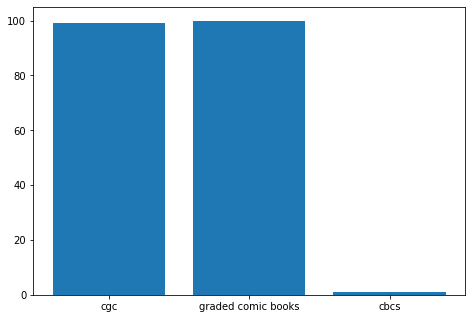

In [77]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(category_hist.keys())
students = list(category_hist.values())
ax.bar(langs,students)
plt.show()

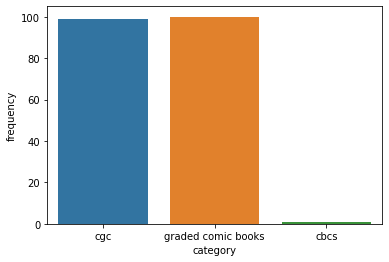

In [78]:
fig = sns.barplot(x='category',y='frequency',data={'category':list(category_hist.keys()),'frequency':list(category_hist.values())});
fig.set(xlabel='category', ylabel='frequency')
plt.show()

# category vs price distribution

In [79]:
category_price = [((category['name']).lower(),int(product['prices']['price'])/100) for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for category in product['categories']]

In [80]:
category_price

[('cgc', 1499.99),
 ('graded comic books', 1499.99),
 ('cgc', 849.99),
 ('graded comic books', 849.99),
 ('cgc', 114.99),
 ('graded comic books', 114.99),
 ('cgc', 4824.99),
 ('graded comic books', 4824.99),
 ('cgc', 124.99),
 ('graded comic books', 124.99),
 ('cbcs', 374.99),
 ('graded comic books', 374.99),
 ('cgc', 29.99),
 ('graded comic books', 29.99),
 ('cgc', 74.99),
 ('graded comic books', 74.99),
 ('cgc', 924.99),
 ('graded comic books', 924.99),
 ('cgc', 619.99),
 ('graded comic books', 619.99),
 ('cgc', 74.99),
 ('graded comic books', 74.99),
 ('cgc', 49.99),
 ('graded comic books', 49.99),
 ('cgc', 74.99),
 ('graded comic books', 74.99),
 ('cgc', 89.99),
 ('graded comic books', 89.99),
 ('cgc', 54.99),
 ('graded comic books', 54.99),
 ('cgc', 1499.99),
 ('graded comic books', 1499.99),
 ('cgc', 5199.99),
 ('graded comic books', 5199.99),
 ('cgc', 3099.99),
 ('graded comic books', 3099.99),
 ('cgc', 2199.99),
 ('graded comic books', 2199.99),
 ('cgc', 899.99),
 ('graded comi

In [81]:
category_price = {}

for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
    for category in product['categories']:
        if category['name'].lower() not in category_price.keys():
            category_price[category['name'].lower()] = list([int(product['prices']['price'])/100])
        else:
            category_price[category['name'].lower()].append(int(product['prices']['price'])/100)
category_price
        

{'cgc': [1499.99,
  849.99,
  114.99,
  4824.99,
  124.99,
  29.99,
  74.99,
  924.99,
  619.99,
  74.99,
  49.99,
  74.99,
  89.99,
  54.99,
  1499.99,
  5199.99,
  3099.99,
  2199.99,
  899.99,
  109.99,
  89.99,
  124.99,
  224.99,
  149.99,
  124.99,
  124.99,
  249.99,
  174.99,
  59.99,
  69.99,
  59.99,
  119.99,
  49.99,
  199.99,
  89.99,
  39.99,
  29.99,
  169.99,
  99.99,
  6649.99,
  84.99,
  74.99,
  99.99,
  119.99,
  499.99,
  59.99,
  474.99,
  79.99,
  249.99,
  99.99,
  119.99,
  74.99,
  64.99,
  79.99,
  39.99,
  39.99,
  5499.99,
  1649.99,
  1099.99,
  2199.99,
  549.99,
  599.99,
  949.99,
  199.99,
  114.99,
  274.99,
  64.99,
  374.99,
  324.99,
  134.99,
  49.99,
  49.99,
  24.99,
  44.99,
  99.99,
  59.99,
  74.99,
  124.99,
  224.99,
  149.99,
  99.99,
  74.99,
  324.99,
  224.99,
  149.99,
  44.99,
  99.99,
  114.99,
  124.99,
  174.99,
  219.99,
  149.99,
  124.99,
  299.99,
  79.99,
  49.99,
  674.99,
  1699.99,
  799.99],
 'graded comic books': [1499.99

In [82]:

category_avg_price = {}
#average price
for category in category_price.keys():
    category_avg_price[category]= np.mean(category_price[category])
category_avg_price

{'cgc': 546.151616161616,
 'graded comic books': 544.4399999999998,
 'cbcs': 374.99}

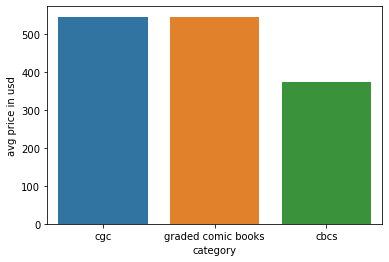

In [83]:
fig = sns.barplot(x='category',y='avg price',data={'category':list(category_avg_price.keys()),'avg price':list(category_avg_price.values())});
fig.set(xlabel='category', ylabel='avg price in usd')
plt.show()

# category vs price range

In [84]:
category_price_range = {}

for category in category_price.keys():
    category_price_range[category]= (min(category_price[category]), max(category_price[category]))
category_price_range

{'cgc': (24.99, 6649.99),
 'graded comic books': (24.99, 6649.99),
 'cbcs': (374.99, 374.99)}

# Discount

# category vs discount

In [85]:
# transforming into dictionary obj
category_discount = {}

for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
    for category in product['categories']:
        if category['name'].lower() not in category_discount.keys():
            category_discount[category['name'].lower()] = list([int(product['prices']['regular_price'])/100 - int(product['prices']['sale_price'])/100 ])
        else:
            category_discount[category['name'].lower()].append(int(product['prices']['regular_price'])/100 - int(product['prices']['sale_price'])/100)
category_discount

{'cgc': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  30.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  125.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'graded comic books': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  30.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


##  discount range per category

In [86]:



category_discount_range = {}

for category in category_discount.keys():
    category_discount_range[category]= (min(category_discount[category]),np.median(category_discount[category]), max(category_discount[category]))
category_discount_range


{'cgc': (0.0, 0.0, 125.0),
 'graded comic books': (0.0, 0.0, 125.0),
 'cbcs': (0.0, 0.0, 0.0)}

# avg discount per category

In [87]:

category_avg_discount = {}

for category in category_discount.keys():
    category_avg_discount[category]= np.mean(category_discount[category])
category_avg_discount

{'cgc': 1.5656565656565657, 'graded comic books': 1.55, 'cbcs': 0.0}

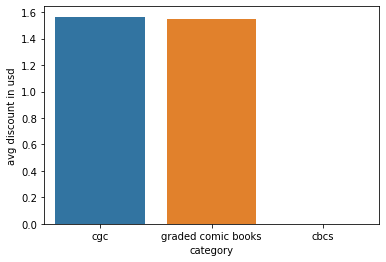

In [88]:
fig = sns.barplot(x='category',y='avg discount',data={'category':list(category_avg_discount.keys()),'avg discount':list(category_avg_discount.values())});
fig.set(xlabel='category', ylabel='avg discount in usd')
plt.show()

# tag vs frequency distribution

In [89]:
import pandas as pd

In [90]:
tag_list = [(category['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for category in product['tags']] 

In [91]:
tag_hist = histogram_generator(tag_list)

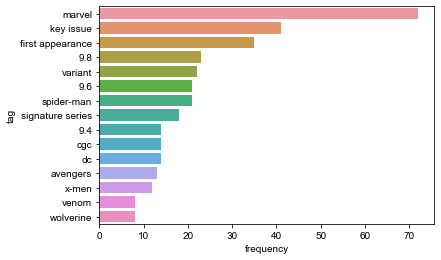

In [92]:
tag_df = pd.DataFrame({'tag':list(tag_hist.keys()),'frequency':list(tag_hist.values())})

tag_df.sort_values(by=['frequency'],inplace=True, ascending=False)

fig = sns.barplot(x='frequency',y='tag',data=tag_df.head(15));
fig.set(xlabel='frequency', ylabel='tag')

sns.set(rc = {'figure.figsize':(15,8)})
plt.show()

# category vs average_rating

In [93]:
# transforming into dictionary obj
category_rating = {}

for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
    for category in product['categories']:
        rating = int(product['average_rating'])
        rating = rating if rating >= 0 else 0
        if category['name'].lower() not in category_rating.keys():
            category_rating[category['name'].lower()] = list([rating])
        else:
            category_rating[category['name'].lower()].append(rating)
category_rating

{'cgc': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'graded comic books': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


# rating range per category

In [94]:

category_rating_range = {}

for category in category_rating.keys():
    category_rating_range[category]= (min(category_rating[category]), max(category_rating[category]))
category_rating_range

{'cgc': (0, 0), 'graded comic books': (0, 0), 'cbcs': (0, 0)}

# average rating per category

In [95]:

category_avg_rating = {}

for category in category_rating.keys():
    category_avg_rating[category]= np.mean(category_rating[category])
category_avg_rating

{'cgc': 0.0, 'graded comic books': 0.0, 'cbcs': 0.0}

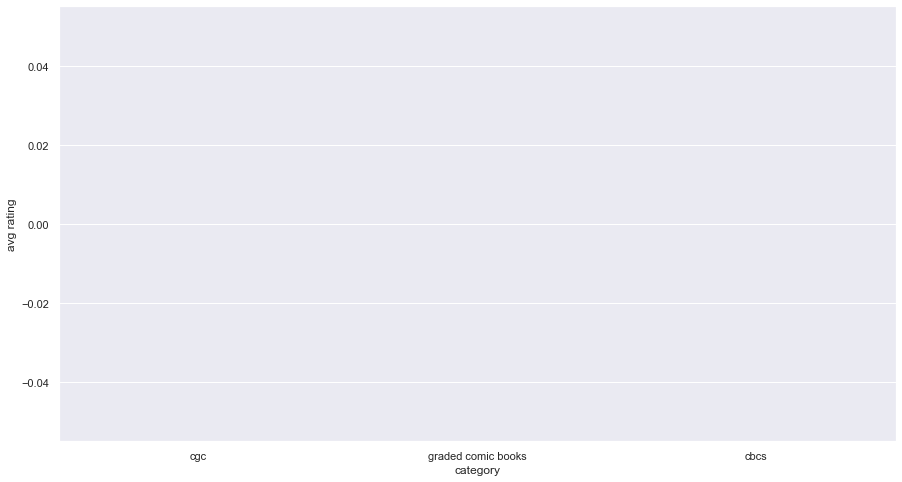

In [96]:
fig = sns.barplot(x='category',y='avg rating',data={'category':list(category_avg_rating.keys()),'avg rating':list(category_avg_rating.values())});
fig.set(xlabel='category', ylabel='avg rating')
plt.show()

# review_count vs category

In [97]:
# transforming into dictionary obj
category_review = {}

for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
    for category in product['categories']:
        review = int(product['review_count'])
        review = review if review >= 0 else 0
        if category['name'].lower() not in category_review.keys():
            category_review[category['name'].lower()] = list([review])
        else:
            category_review[category['name'].lower()].append(review)
category_review

{'cgc': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'graded comic books': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


# review_count range per category

In [98]:
category_review_range = {}

for category in category_review.keys():
    category_review_range[category]= (min(category_review[category]), max(category_review[category]))
category_review_range

{'cgc': (0, 0), 'graded comic books': (0, 0), 'cbcs': (0, 0)}

# average review_count per category

In [99]:
category_avg_review = {}

for category in category_review.keys():
    category_avg_review[category]= np.mean(category_review[category])
category_avg_review

{'cgc': 0.0, 'graded comic books': 0.0, 'cbcs': 0.0}

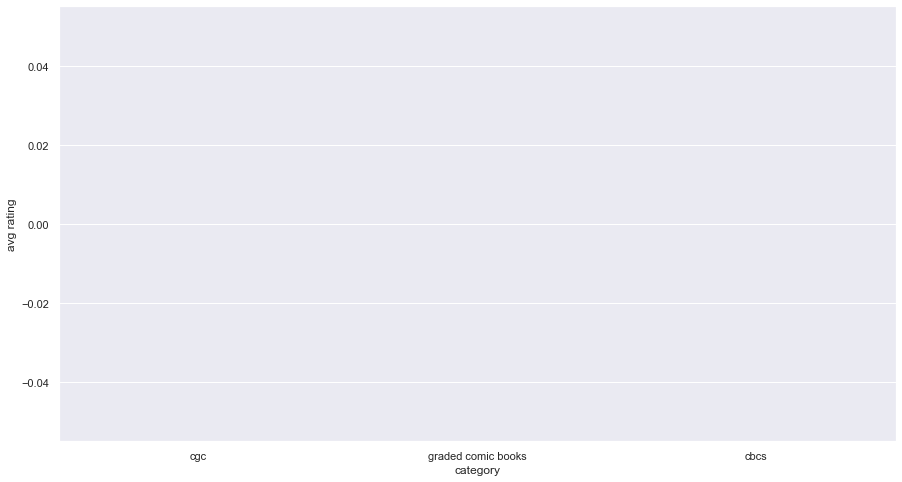

In [100]:
fig = sns.barplot(x='category',y='avg rating',data={'category':list(category_avg_rating.keys()),'avg rating':list(category_avg_rating.values())});
fig.set(xlabel='category', ylabel='avg rating')
plt.show()

# visualization of wordpress data

# post distribution day wise

In [101]:
post_date = {} 
for post in CONTENT_OBJ['wordpress']['edges']['wp/v2/posts']: #two post doesnt have a same id
        post_date[post['id']] = datetime.strptime(post['date'],"%Y-%m-%dT%H:%M:%S")

post_date

{54573: datetime.datetime(2021, 8, 28, 4, 0, 48),
 54279: datetime.datetime(2021, 8, 21, 4, 0, 8),
 53875: datetime.datetime(2021, 8, 14, 3, 5, 11),
 54035: datetime.datetime(2021, 8, 7, 0, 5, 24),
 53683: datetime.datetime(2021, 7, 31, 10, 13, 2),
 50408: datetime.datetime(2021, 4, 26, 7, 0, 45),
 47275: datetime.datetime(2021, 2, 15, 22, 35, 15),
 44555: datetime.datetime(2020, 9, 18, 6, 0, 36),
 38942: datetime.datetime(2020, 8, 13, 20, 25, 47),
 41699: datetime.datetime(2020, 3, 27, 5, 30, 14),
 41650: datetime.datetime(2020, 3, 20, 5, 30, 37),
 41566: datetime.datetime(2020, 3, 13, 5, 30, 33),
 41453: datetime.datetime(2020, 3, 6, 5, 30, 51),
 40587: datetime.datetime(2020, 1, 27, 21, 43, 22),
 40152: datetime.datetime(2019, 11, 26, 15, 42, 31),
 40126: datetime.datetime(2019, 11, 22, 0, 0, 11),
 39850: datetime.datetime(2019, 9, 26, 16, 46, 20),
 39837: datetime.datetime(2019, 9, 23, 23, 0, 11),
 39747: datetime.datetime(2019, 9, 17, 21, 10, 42),
 39344: datetime.datetime(2019, 8

In [102]:
(post_date[36087]-post_date[35988]).days

4

In [103]:
sorted(post_date.values())

[datetime.datetime(2017, 3, 30, 1, 49, 36),
 datetime.datetime(2017, 4, 3, 18, 45, 58),
 datetime.datetime(2017, 4, 20, 17, 55, 20),
 datetime.datetime(2017, 4, 24, 17, 40, 38),
 datetime.datetime(2017, 5, 5, 1, 53, 32),
 datetime.datetime(2017, 6, 2, 14, 12, 45),
 datetime.datetime(2017, 6, 15, 17, 20, 53),
 datetime.datetime(2017, 7, 31, 16, 46, 36),
 datetime.datetime(2017, 8, 17, 21, 56, 26),
 datetime.datetime(2017, 8, 25, 21, 56, 56),
 datetime.datetime(2017, 9, 8, 16, 51, 48),
 datetime.datetime(2017, 10, 11, 22, 43, 48),
 datetime.datetime(2017, 11, 3, 16, 17, 5),
 datetime.datetime(2017, 11, 30, 16, 59, 50),
 datetime.datetime(2017, 12, 15, 21, 41, 20),
 datetime.datetime(2018, 1, 19, 16, 33, 44),
 datetime.datetime(2018, 2, 4, 11, 16, 51),
 datetime.datetime(2018, 2, 7, 15, 9, 29),
 datetime.datetime(2018, 2, 28, 21, 58, 16),
 datetime.datetime(2018, 4, 13, 21, 25, 57),
 datetime.datetime(2018, 5, 17, 11, 41, 53),
 datetime.datetime(2018, 7, 24, 23, 1, 5),
 datetime.datetime(

# post frequency day wise

In [104]:
post_count_per_day = {}
date_benchmark = sorted(post_date.values())[0]
for key in post_date.keys():
    day = (post_date[key]-date_benchmark).days
    if day not in post_count_per_day.keys():
        if day == 0:
            post_count_per_day[day] = 0
        else:
            post_count_per_day[day] = 1
    else:
        post_count_per_day[day] += 1
post_count_per_day

{1612: 1,
 1605: 1,
 1598: 1,
 1590: 1,
 1584: 1,
 1488: 1,
 1418: 1,
 1268: 1,
 1232: 1,
 1093: 1,
 1086: 1,
 1079: 1,
 1072: 1,
 1033: 1,
 971: 1,
 966: 1,
 910: 1,
 907: 1,
 901: 1,
 873: 1,
 862: 1,
 813: 1,
 723: 1,
 591: 1,
 581: 1,
 558: 1,
 547: 1,
 516: 1,
 512: 1,
 498: 1,
 481: 1,
 413: 1,
 379: 1,
 335: 1,
 314: 1,
 311: 1,
 295: 1,
 260: 1,
 245: 1,
 218: 1,
 195: 1,
 162: 1,
 148: 1,
 140: 1,
 123: 1,
 77: 1,
 64: 1,
 36: 1,
 25: 1,
 21: 1,
 4: 1,
 0: 0}

In [105]:
day = list(post_count_per_day.keys())
freq = list(post_count_per_day.values())

freq[-4] = 50 

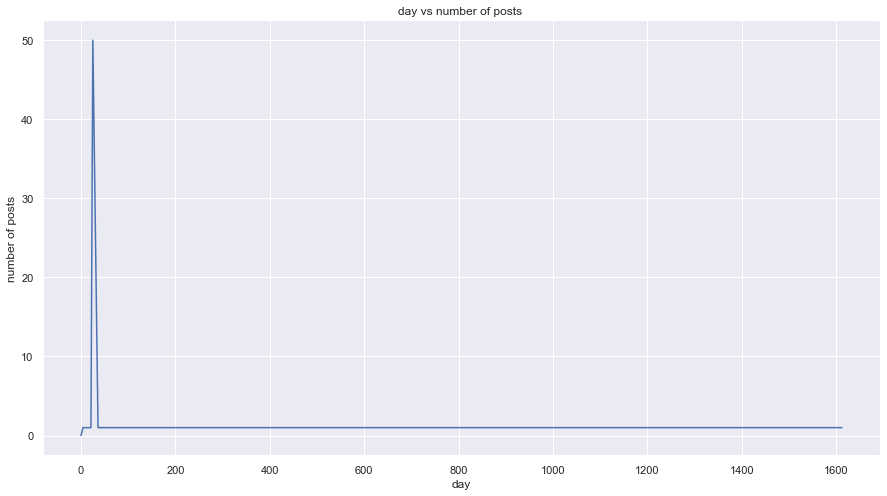

In [106]:
plt.plot(day,freq)
plt.title("day vs number of posts ")
plt.xlabel("day")
plt.ylabel("number of posts")
plt.show();

In [107]:
# not so precised graph

# post frequency year wise

In [108]:

post_count_per_year = {}

for key in post_date.keys():
    year = post_date[key].year
    if year not in post_count_per_year.keys():
        post_count_per_year[year] = 1
    else:
        post_count_per_year[year] += 1
post_count_per_year

{2021: 7, 2020: 7, 2019: 9, 2018: 14, 2017: 15}

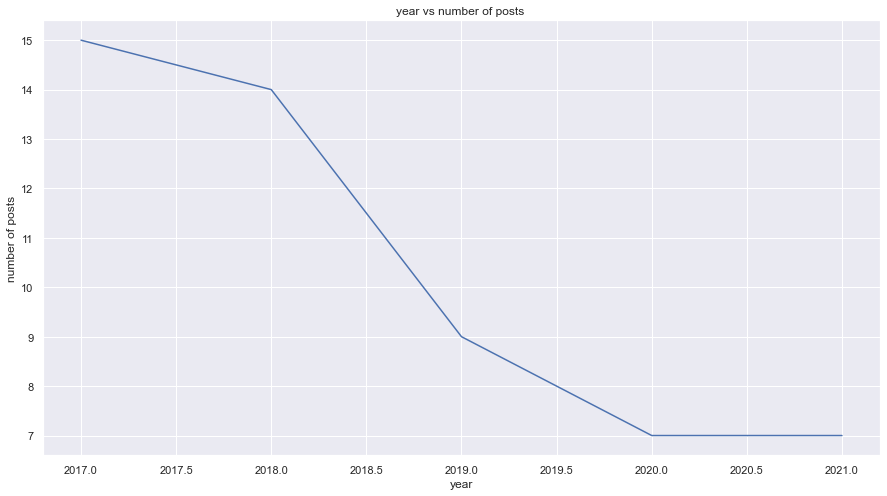

In [109]:
plt.plot(post_count_per_year.keys(),post_count_per_year.values())
plt.title("year vs number of posts ")
plt.xlabel("year")
plt.ylabel("number of posts")
plt.show();

# schema 

```
extra_schema= {
        post_count_per_year : [],
        post_count_per_month : [],
        post_count_per_month:[],
        post_count_per_day : [],
        category_avg_review : {},
        category_review_range : {'cat_name': (min_value,max_value)},
        category_avg_rating : {},
        category_rating_range : {},
        tag_frequency : {},
        category_avg_discount : {},
        category_discount_range : {},
        category_avg_price : {},
        category_price_range : {},
        category_freq : {}
    }
    
}
```

# defining function that can calculate and fill the "\_\_extra\_\_" field


In [117]:
def range_generator(dict_obj):
    range_dic = {}
    for item in dict_obj.keys():
        range_dic[item]= {"min":min(dict_obj[item]),
                                            "mid":np.median(dict_obj[item]),
                                            "max":max(dict_obj[item])}
    return range_dic
    

In [118]:
def avg_generator(dict_obj):
    avg_dic = {}
    for item in dict_obj.keys():
        avg_dic[item]= np.mean(dict_obj[item])
    return avg_dic
    

In [119]:
range_generator(category_price)

{'cgc': {'min': 24.99, 'mid': 124.99, 'max': 6649.99},
 'graded comic books': {'min': 24.99, 'mid': 124.99, 'max': 6649.99},
 'cbcs': {'min': 374.99, 'mid': 374.99, 'max': 374.99}}

In [120]:
avg_generator(category_price)

{'cgc': 546.151616161616,
 'graded comic books': 544.4399999999998,
 'cbcs': 374.99}

In [127]:
def parse_extra_data(content):
    #load __extra__schema
    __extra__data = None
    with open("../__extra__schema.json") as f:
        __extra__data = json.load(f)

    #category frequency-------------------------------
    category_set_1 = [(category['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for category in product['categories']]  #captured from products 
    category_hist = histogram_generator(category_set_1)
    #filling __extra__data field
    __extra__data['category_freq'] = category_hist
    
    
    #tag frequency------------------------------------
    tag_list = [(category['name']).lower() for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products'] 
                  for category in product['tags']] 
    tag_hist = histogram_generator(tag_list)
    #filling __extra__data field
    __extra__data['tag_freq'] = tag_hist
    
    
    #category vs price -------------------------------
    category_price = {}
    
    #category price
    for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
        for category in product['categories']:
            if category['name'].lower() not in category_price.keys():
                category_price[category['name'].lower()] = list([int(product['prices']['price'])/100])
            else:
                category_price[category['name'].lower()].append(int(product['prices']['price'])/100)
    
    #filling __extra_data field
    __extra__data['category_price_range']= range_generator(category_price)
    __extra__data['category_avg_price'] = avg_generator(category_price)
    
    #category vs discount-------------------------------------------------
    category_discount = {}
    
    for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
        for category in product['categories']:
            if category['name'].lower() not in category_discount.keys():
                category_discount[category['name'].lower()] = list([int(product['prices']['regular_price'])/100 - int(product['prices']['sale_price'])/100 ])
            else:
                category_discount[category['name'].lower()].append(int(product['prices']['regular_price'])/100 - int(product['prices']['sale_price'])/100)
    
    #filling __extra__data field
    __extra__data['category_discount_range'] = range_generator(category_discount)
    __extra__data['category_avg_discount'] = avg_generator(category_discount)
    
    #category vs average rating--------------------------------------------------
    category_rating = {}
    for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
        for category in product['categories']:
            rating = int(product['average_rating'])
            rating = rating if rating >= 0 else 0
            if category['name'].lower() not in category_rating.keys():
                category_rating[category['name'].lower()] = list([rating])
            else:
                category_rating[category['name'].lower()].append(rating)
    
    #filling __extra__data field
    __extra__data['category_rating_range'] = range_generator(category_rating)
    __extra__data['category_avg_rating'] = avg_generator(category_rating)
    
    #category review-------------------------------------------------------------
    category_review = {}
    for product in CONTENT_OBJ['woocommerce']['edges']['wc/store/products']:
        for category in product['categories']:
            review = int(product['review_count'])
            review = review if review >= 0 else 0
            if category['name'].lower() not in category_review.keys():
                category_review[category['name'].lower()] = list([review])
            else:
                category_review[category['name'].lower()].append(review)
    
    #filling __extra__data field
    __extra__data['category_review_range'] = range_generator(category_review)
    __extra__data['category_avg_review'] = avg_generator(category_review)
    
    
    #cms __extra__data----------------------------------
    #post frequency per year
    post_date = {} 
    for post in CONTENT_OBJ['wordpress']['edges']['wp/v2/posts']: #two post doesnt have a same id
            post_date[post['id']] = datetime.strptime(post['date'],"%Y-%m-%dT%H:%M:%S")

    post_count_per_year = {}
    for key in post_date.keys():
        year = post_date[key].year
        if year not in post_count_per_year.keys():
            post_count_per_year[year] = 1
        else:
            post_count_per_year[year] += 1
    #filling __extra__data field
    __extra__data['post_count_per_year'] = post_count_per_year 
    
    
    
    return __extra__data
    
  

    
    
    

In [128]:
parse_extra_data(CONTENT_FILE)

{'post_count_per_year': {2021: 7, 2020: 7, 2019: 9, 2018: 14, 2017: 15},
 'post_count_per_month': {},
 'post_count_per_day': {},
 'category_avg_review': {'cgc': 0.0, 'graded comic books': 0.0, 'cbcs': 0.0},
 'category_review_range': {'cgc': {'min': 0, 'mid': 0.0, 'max': 0},
  'graded comic books': {'min': 0, 'mid': 0.0, 'max': 0},
  'cbcs': {'min': 0, 'mid': 0.0, 'max': 0}},
 'category_avg_rating': {'cgc': 0.0, 'graded comic books': 0.0, 'cbcs': 0.0},
 'category_rating_range': {'cgc': {'min': 0, 'mid': 0.0, 'max': 0},
  'graded comic books': {'min': 0, 'mid': 0.0, 'max': 0},
  'cbcs': {'min': 0, 'mid': 0.0, 'max': 0}},
 'tag_frequency': {},
 'category_avg_discount': {'cgc': 1.5656565656565657,
  'graded comic books': 1.55,
  'cbcs': 0.0},
 'category_discount_range': {'cgc': {'min': 0.0, 'mid': 0.0, 'max': 125.0},
  'graded comic books': {'min': 0.0, 'mid': 0.0, 'max': 125.0},
  'cbcs': {'min': 0.0, 'mid': 0.0, 'max': 0.0}},
 'category_avg_price': {'cgc': 546.151616161616,
  'graded com

In [2]:
d1 = {"a":[], "b":2}
d2 = {"a":5,"c":3}

d = {}
d.update(d1)
d.update(d2)
d

{'a': 5, 'b': 2, 'c': 3}

In [ ]:
'''
Category vs count ko boxplot garna sakinxa bar graph/chart sakinxa
Category vs price or price range ni sakinxa
Discount ni nikaalna sakinxa ... regular_price , sale_price or compared_price bhanney xa
Category vs discount ni sakinxa ... discount vs count vs price ni sakinxa
Product vs created_date vs pubished/updated date ley ... how many new items has been added with time ni nikaalna sakinxa hola.... publishes date ra updated date aalik bujheako xuina
Product vs date nikaalim bhanney ..trend of sales ni nikalna sakinxa jasto laagyo .... date anusar product frequency nikaalim bhanney ...
Reviews ra rating baata ni ek duita summary nikaalna saki haalinxa

'''

# Summarizing Shopify

In [6]:
from datetime import datetime,timezone

In [7]:
CONTENT_OBJ = None #function parameter
SCHEMA_PATH = "../schema.json"
CONTENT_FILE = "../allbirds.json"
# CONTENT_FILE="porterandyork.json"


In [8]:
with open(CONTENT_FILE) as f:
    CONTENT_OBJ = json.load(f)

In [6]:
len(CONTENT_OBJ)

3

In [7]:
CONTENT_OBJ

{'wordpress': None,
 'woocommerce': None,
 'shopify': {'edges': {'products.json': [{'id': 6622302011472,
     'title': "Women's Wool Runner-up Mizzle Fluffs - Natural Black (Black Sole)",
     'handle': 'womens-wool-runner-up-mizzle-fluffs-natural-black',
     'body_html': '<p>Our wet-weather no-slip high top with added fluff for cozy comfort. </p>',
     'published_at': '2022-02-03T10:06:33-08:00',
     'created_at': '2021-11-15T10:42:08-08:00',
     'updated_at': '2022-02-08T01:37:15-08:00',
     'vendor': 'Allbirds',
     'product_type': 'Shoes',
     'tags': ['allbirds::cfId => color-womens-wool-runnerup-mizzle-fluffs-natural-black-black',
      'allbirds::complete => true',
      'allbirds::edition => limited',
      'allbirds::gender => womens',
      'allbirds::hue => black',
      'allbirds::master => womens-wool-runner-up-mizzle-fluffs',
      'allbirds::material => wool',
      'allbirds::silhouette => runner up',
      'loop::returnable => true',
      'YCRF_womens-move-shoe

In [11]:
#vendor 
vendor_list = []
for product in CONTENT_OBJ['shopify']['edges'].get('products.json',False):
    if product.get('vendor',False):
        vendor_list.append(product.get('vendor'))

list(set(vendor_list))[:10]


['Allbirds']

In [20]:
#price
for product in CONTENT_OBJ['shopify']['edges'].get('products.json',False):
        for var in product.get('variants',False):
            price_list.append(float(var.get('price',"0")))
price_list[:10]

[148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 148.0, 68.0, 68.0, 68.0]

In [21]:
high = max(price_list)
upper_avg = np.quantile(price_list,0.75)
avg = np.quantile(price_list,0.5)
lower_avg = np.quantile(price_list,0.25)
lower = min(price_list)

In [22]:
print(f"high: {high} upper_avg: {upper_avg} avg: {avg} lower_avg: {lower_avg} lower: {lower}")

high: 150.0 upper_avg: 118.0 avg: 98.0 lower_avg: 98.0 lower: 12.0


In [14]:
# frequency 
product_post_date = []
for product in CONTENT_OBJ['shopify']['edges'].get('products.json',False):
    if product.get('published_at',False):
#         product_post_date.append(datetime.strptime(product['published_at'][:19],"%Y-%m-%dT%H:%M:%S"))
        product_post_date.append(datetime.fromisoformat(product['published_at']).astimezone(timezone.utc).replace(tzinfo=None)) 

product_post_date.sort()
product_post_date[:10]



[datetime.datetime(2021, 10, 28, 1, 54, 35),
 datetime.datetime(2021, 10, 28, 1, 54, 46),
 datetime.datetime(2021, 10, 28, 1, 55, 47),
 datetime.datetime(2021, 10, 28, 1, 55, 53),
 datetime.datetime(2021, 11, 1, 1, 51, 2),
 datetime.datetime(2021, 11, 1, 1, 51, 13),
 datetime.datetime(2021, 11, 1, 1, 51, 24),
 datetime.datetime(2021, 11, 1, 1, 51, 49),
 datetime.datetime(2021, 11, 1, 1, 51, 54),
 datetime.datetime(2021, 11, 1, 1, 52)]

In [15]:
if product_post_date[0]: # if there exists any posts
    first_post_date = product_post_date[0]
    last_post_date = product_post_date[-1]
first_post_date , last_post_date

(datetime.datetime(2021, 10, 28, 1, 54, 35),
 datetime.datetime(2022, 2, 3, 18, 6, 33))

In [16]:
post_freq = get_frequency(first_post_date,last_post_date,len(product_post_date))

NameError: name 'get_frequency' is not defined

In [57]:
post_freq

{'post_per_day': 4.854368932038835,
 'post_per_week': 35.714285714285715,
 'post_per_month': 166.66666666666666}

In [59]:
# count product
products_count = 0
for collection in CONTENT_OBJ['shopify']['edges'].get('collections.json',False):
    products_count += collection.get('products_count',0)
products_count

5707

In [3]:
a = {"a":{"b":None}}
a["a"]["c"] = 5
a

{'a': {'b': None, 'c': 5}}

In [13]:
datetime.fromisoformat("2022-02-03T10:06:33-08:00").astimezone(timezone.utc).replace(tzinfo=None)

datetime.datetime(2022, 2, 3, 18, 6, 33)

In [20]:
max(1,2,3)

3

In [22]:
len("")

0

In [26]:
titles = [product['title'] for product in CONTENT_OBJ['shopify']['edges'].get('products.json',[])]

In [10]:
titles[:10]

["Women's Wool Runner-up Mizzle Fluffs - Natural Black (Black Sole)",
 'Wool Dwellers - Hazy Mauve (Hazy Mauve Sole)',
 'Wool Dwellers - Heathered Grey (Grey Sole)',
 "Men's Long Sleeve Sea Tee - Hazy Pine",
 "Women's Long Sleeve Sea Tee - Hazy Sienna",
 "Men's Long Sleeve Sea Tee - Hazy Sienna",
 "Women's Long Sleeve Sea Tee - Hazy Pine",
 "Women's R&R Sweatpant - Hazy Sienna",
 "Women's R&R Sweatpant - Hazy Pine",
 "Men's R&R Sweatpant - Hazy Sienna"]

In [11]:
len(titles) , len(set(titles))

(250, 250)

In [27]:
title_hist = histogram_generator(titles)
title_hist

{"Women's Wool Runner-up Mizzle Fluffs - Natural Black (Black Sole)": 1,
 'Wool Dwellers - Hazy Mauve (Hazy Mauve Sole)': 1,
 'Wool Dwellers - Heathered Grey (Grey Sole)': 1,
 "Men's Long Sleeve Sea Tee - Hazy Pine": 1,
 "Women's Long Sleeve Sea Tee - Hazy Sienna": 1,
 "Men's Long Sleeve Sea Tee - Hazy Sienna": 1,
 "Women's Long Sleeve Sea Tee - Hazy Pine": 1,
 "Women's R&R Sweatpant - Hazy Sienna": 1,
 "Women's R&R Sweatpant - Hazy Pine": 1,
 "Men's R&R Sweatpant - Hazy Sienna": 1,
 "Men's R&R Sweatpant - Hazy Pine": 1,
 "Men's R&R Sweatshirt - Hazy Sienna": 1,
 "Men's R&R Sweatshirt - Hazy Pine": 1,
 "Women's R&R Hoodie - Hazy Sienna": 1,
 "Women's R&R Hoodie - Hazy Pine": 1,
 "Men's R&R Hoodie - Hazy Sienna": 1,
 "Men's R&R Hoodie - Hazy Pine": 1,
 "Women's R&R Sweatshirt - Hazy Sienna": 1,
 "Women's R&R Sweatshirt - Hazy Pine": 1,
 "Women's Tree Pipers - Tamalpais (White Sole)": 1,
 "Men's Tree Dashers - Gaia (White Sole)": 1,
 "Men's Tree Runners - Bough (Taupe Sole)": 1,
 "Men's 

In [28]:
total= sum([value for value in title_hist.values()])
total, len(titles)

(250, 250)

In [31]:
def hist_value_to_percentage(hist):
    item_percentage = []
    total= sum([value for value in hist.values()])
    for item in hist:
        item_percentage.append({"name":item,"percent":hist[item]/total*100})
    return item_percentage

In [32]:
hist_percent = hist_value_to_percentage(title_hist)
hist_percent

[{'name': "Women's Wool Runner-up Mizzle Fluffs - Natural Black (Black Sole)",
  'percent': 0.4},
 {'name': 'Wool Dwellers - Hazy Mauve (Hazy Mauve Sole)', 'percent': 0.4},
 {'name': 'Wool Dwellers - Heathered Grey (Grey Sole)', 'percent': 0.4},
 {'name': "Men's Long Sleeve Sea Tee - Hazy Pine", 'percent': 0.4},
 {'name': "Women's Long Sleeve Sea Tee - Hazy Sienna", 'percent': 0.4},
 {'name': "Men's Long Sleeve Sea Tee - Hazy Sienna", 'percent': 0.4},
 {'name': "Women's Long Sleeve Sea Tee - Hazy Pine", 'percent': 0.4},
 {'name': "Women's R&R Sweatpant - Hazy Sienna", 'percent': 0.4},
 {'name': "Women's R&R Sweatpant - Hazy Pine", 'percent': 0.4},
 {'name': "Men's R&R Sweatpant - Hazy Sienna", 'percent': 0.4},
 {'name': "Men's R&R Sweatpant - Hazy Pine", 'percent': 0.4},
 {'name': "Men's R&R Sweatshirt - Hazy Sienna", 'percent': 0.4},
 {'name': "Men's R&R Sweatshirt - Hazy Pine", 'percent': 0.4},
 {'name': "Women's R&R Hoodie - Hazy Sienna", 'percent': 0.4},
 {'name': "Women's R&R Hood

# WordFence v2/Categories

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with open('wordfence-categories.json') as f:
    v2_categories = json.load(f)

In [5]:
len(v2_categories)

10

In [6]:
v2_categories

[{'id': 1405,
  'count': 7,
  'description': '',
  'link': 'https://www.wordfence.com/blog/category/ask-wordfence/',
  'name': 'Ask Wordfence',
  'slug': 'ask-wordfence',
  'taxonomy': 'category',
  'parent': 0,
  'meta': [],
  'yoast_head': '<!-- This site is optimized with the Yoast SEO plugin v18.3 - https://yoast.com/wordpress/plugins/seo/ -->\n<title>Ask Wordfence Archives - Wordfence</title>\n<meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n<link rel="canonical" href="https://www.wordfence.com/blog/category/ask-wordfence/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Ask Wordfence Archives - Wordfence" />\n<meta property="og:url" content="https://www.wordfence.com/blog/category/ask-wordfence/" />\n<meta property="og:site_name" content="Wordfence" />\n<meta name="twitter:card" content="summary_large_image" />\n<meta name="twitter:sit